# Boosting Algorithm

<h3 style="text-align:center">Types of Machine Learning models</h3>
<center><img src="../images/types_of_ml_models.png"/></center>


<h3 style="text-align:center">Boosting Ensemble</h3>
<center><img src="../images/boosting_ensemble_learning.png" height=500/></center>

**For more details:**
- [A Gentle Introduction to Ensemble Learning Algorithms](https://machinelearningmastery.com/tour-of-ensemble-learning-algorithms/)
- [Ensemble learning và các biến thể](https://viblo.asia/p/ensemble-learning-va-cac-bien-the-p1-WAyK80AkKxX)
- [A Step by Step Adaboost Example](https://sefiks.com/2018/11/02/a-step-by-step-adaboost-example/)
- [sklearn.ensemble.AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)
- [AdaBoost - Bước đi đầu của Boosting](https://viblo.asia/p/adaboost-buoc-di-dau-cua-boosting-gAm5yrGwKdb)
- [sklearn.ensemble.GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier)
- [Gradient Boosting - Tất tần tật về thuật toán mạnh mẽ nhất trong Machine Learning ](https://viblo.asia/p/gradient-boosting-tat-tan-tat-ve-thuat-toan-manh-me-nhat-trong-machine-learning-YWOZrN7vZQ0)

In [1]:
from sklearn.datasets import make_gaussian_quantiles
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from typing import Optional

### Create data

In [2]:
def make_dataset(n: int = 100, random_seed: int = None):
    n_per_class = int(n/2)
    if random_seed:
        np.random.seed(random_seed)
    X, y = make_gaussian_quantiles(n_samples=n, n_features=2, n_classes=2)
    return X, y*2-1

X, y = make_dataset(n=30, random_seed=10)

### Visualize data and prediction

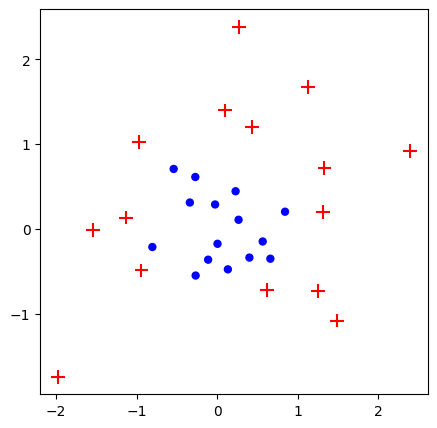

In [3]:
def plot_adaboost(X: np.ndarray,
                  y: np.ndarray,
                  model= None,
                  sample_weights: Optional[np.ndarray] = None,
                  ax: Optional[mpl.axes.Axes] = None):
    def check(y):
        assert set(y) == {-1,1}
        return y

    y = check(y) # Kì vọng nhãn bằng ±1

    if not ax:
        fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
        fig.set_facecolor('white')

    pad = 1
    x_min, x_max = X[:, 0].min() - pad, X[:, 0].max() + pad
    y_min, y_max = X[:, 1].min() - pad, X[:, 1].max() + pad

    if sample_weights is not None:
        sizes = np.array(sample_weights) * X.shape[0] * 100  
    else:
        sizes = np.ones(shape=X.shape[0]) * 100

    X_pos = X[y == 1]
    sizes_pos = sizes[y == 1]
    ax.scatter(*X_pos.T, s=sizes_pos, marker='+', color='red')

    X_neg = X[y == -1]
    sizes_neg = sizes[y == -1]
    ax.scatter(*X_neg.T, s=sizes_neg, marker='.', c='blue')

    if model:
        plot_step = 0.01
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # If all predictions are positive class, adjust color map acordingly
        if list(np.unique(Z)) == [1]:
            fill_colors = ['r']
        else:
            fill_colors = ['b', 'r']

        ax.contourf(xx, yy, Z, colors=fill_colors, alpha=0.2)


plot_adaboost(X, y)

### Build boosting ensemble models and evaluate

#### LogisticRegression only

Train error: 13.3%


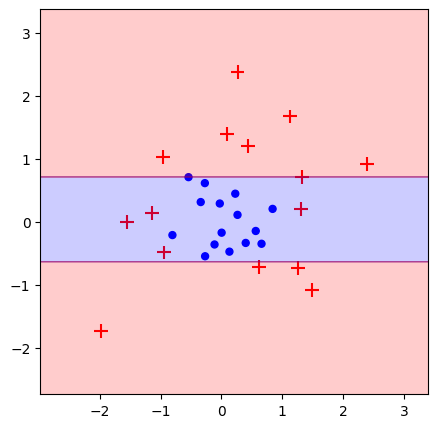

In [4]:
model_00 = DecisionTreeClassifier(criterion="entropy",
                                  splitter="best",
                                  max_depth=2,
                                  random_state=42)

model_00.fit(X, y)

train_err = (model_00.predict(X) != y).mean()
print(f'Train error: {train_err:.1%}')
plot_adaboost(X, y, model=model_00)

#### **AdaBoostClassifier** + DecisionTreeClassifier

Train error: 0.0%


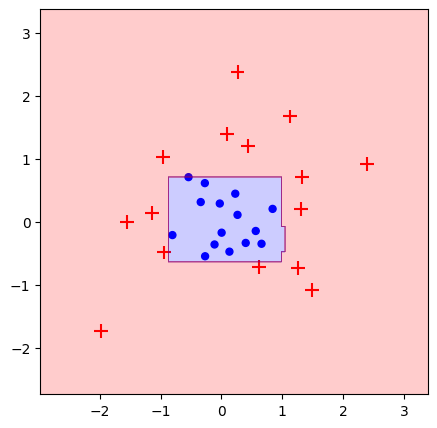

In [5]:
model_01 = AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion="entropy",
                                                               splitter="best",
                                                               max_depth=2,
                                                               random_state=42),
                              n_estimators=15,
                              algorithm='SAMME')
model_01.fit(X, y)

train_err = (model_01.predict(X) != y).mean()
print(f'Train error: {train_err:.1%}')
plot_adaboost(X, y, model=model_01)

#### **Gradient Boosting** + DecisionTreeClassifier

Train error: 0.0%


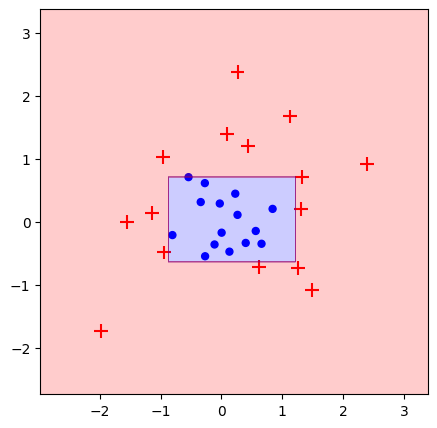

In [6]:
from sklearn.ensemble import GradientBoostingClassifier

model_02 = GradientBoostingClassifier(init=DecisionTreeClassifier(criterion="entropy",
                                                                  splitter="best",
                                                                  max_depth=2,
                                                                  random_state=42),
                                      n_estimators=15,
                                      learning_rate=1.0,
                                      max_depth=2,
                                      random_state=42)
model_02.fit(X, y)

train_err = (model_02.predict(X) != y).mean()
print(f'Train error: {train_err:.1%}')
plot_adaboost(X, y, model=model_02)